In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Загрузка датасета
data = pd.read_csv("hotel_bookings[1].csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [5]:
#Предобработка данных
#Проверка типов данных
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
#Проверка пустых значений
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data = data.drop(columns = 'company')

In [8]:
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [9]:
data['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [10]:
data['agent'] = data['agent'].fillna(0)

In [11]:
data['country'] = data['country'].fillna('Unknown')

In [32]:
data['children'] = data['agent'].dropna()

In [33]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [34]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [35]:
#Проверка типов данных
data.dtypes

hotel                               int32
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int32
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                             int32
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
assigned_room_type                  int32
booking_changes                     int64
deposit_type                        int32
agent                             

In [36]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,0.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,0.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


<AxesSubplot: >

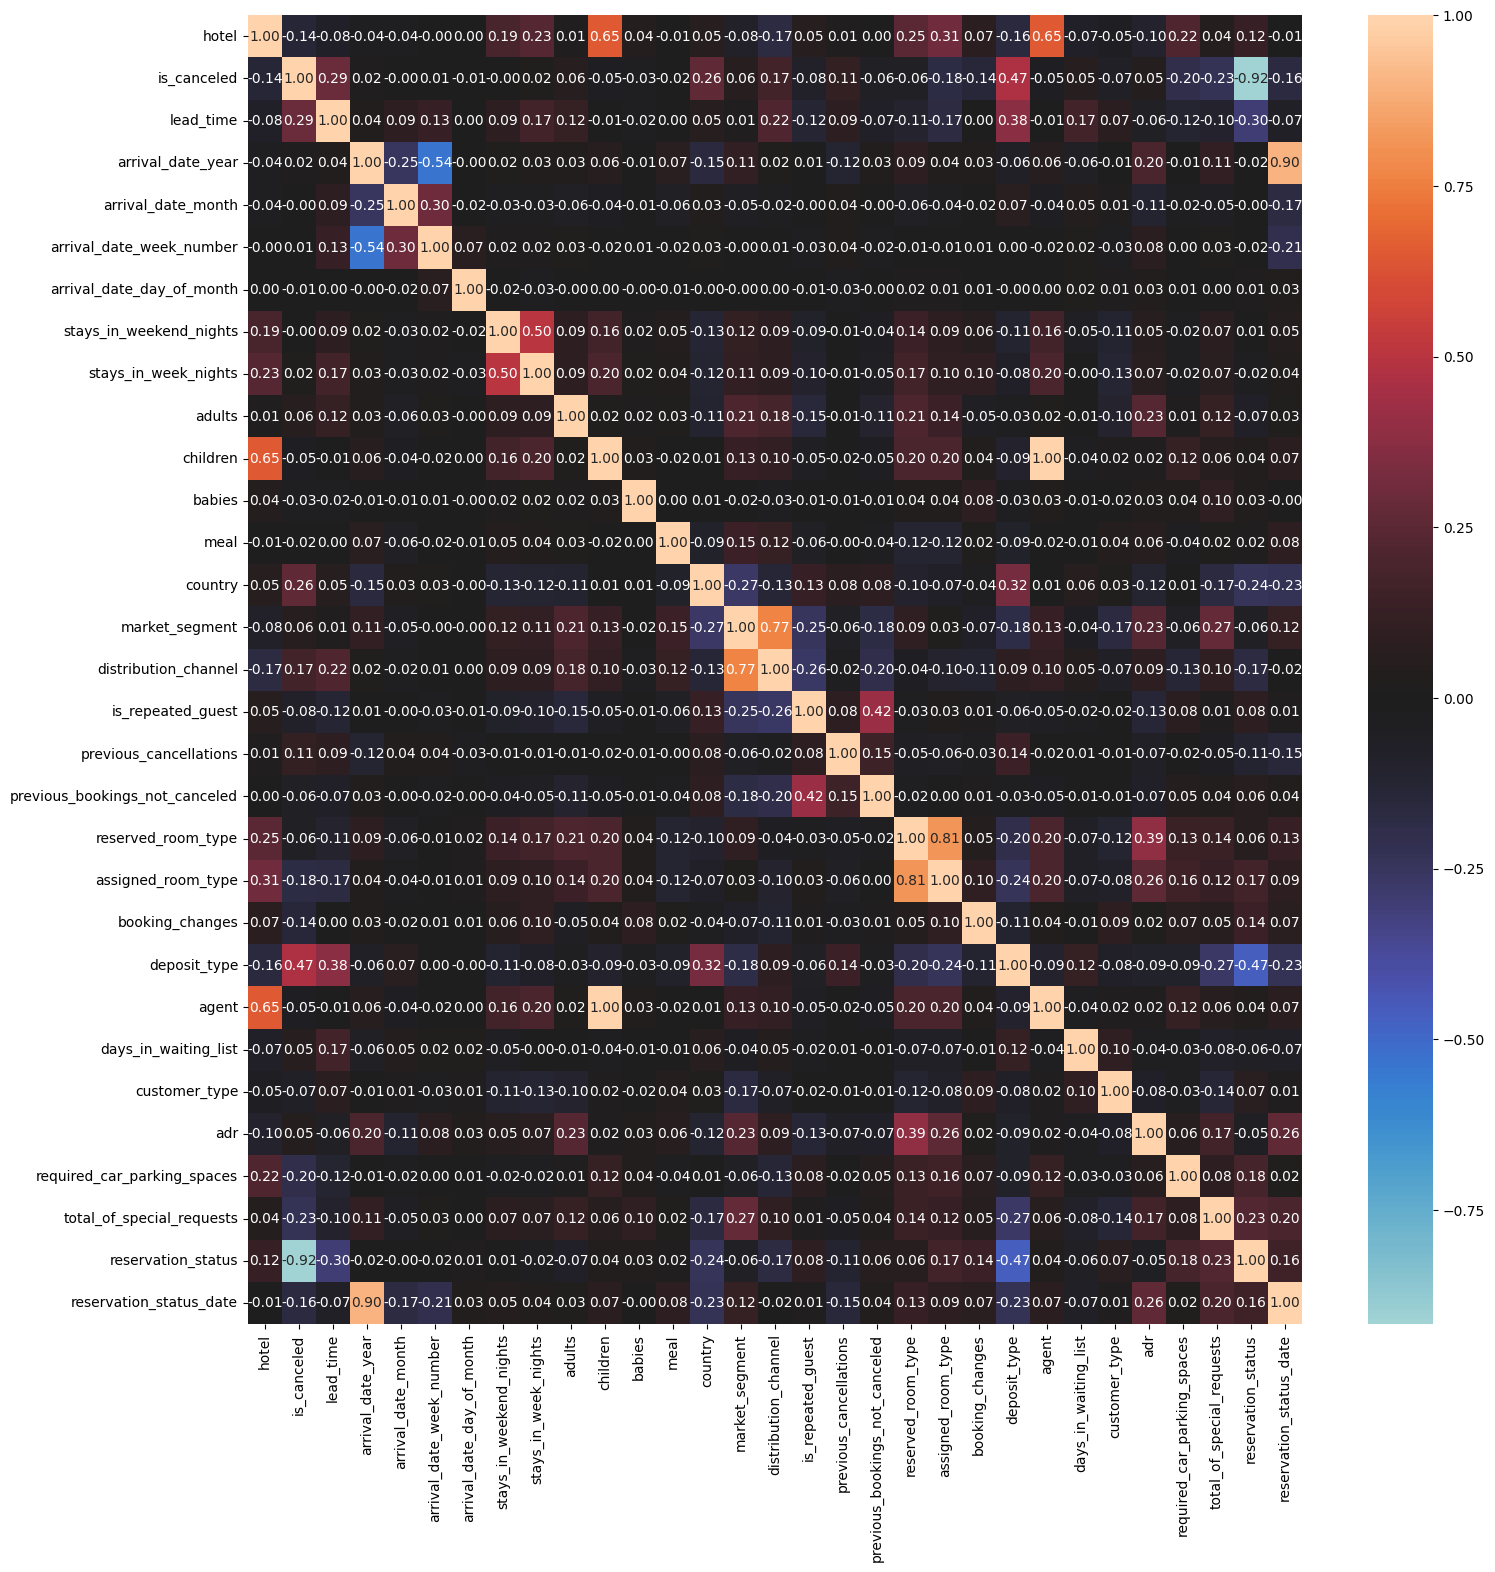

In [37]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0,)

In [38]:
#Разделение выборки на обучающую и тестовую
target = "arrival_date_week_number"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

**Линейная регрессия**

In [39]:
LR = LinearRegression()
LR.fit(trainX, trainY)

LinearRegression()

In [40]:
R2_LR = r2_score(testY, LR.predict(testX))
RMSE_LR = mean_squared_error(testY, LR.predict(testX), squared=True)

In [41]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_LR))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_LR))

Оценка качества модели с помощью коэффициента детерминации: 0.8433465399908049
Корень из средней квадратичной ошибки: 29.29570211339107


**Случайный лес**

In [42]:
RT = RandomForestRegressor(n_estimators=10, random_state=1)
RT.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [43]:
R2_RT = r2_score(testY, RT.predict(testX))

In [44]:
RMSE_RT= mean_squared_error(testY, RT.predict(testX), squared=True)

In [45]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RT))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RT))

Оценка качества модели с помощью коэффициента детерминации: 0.9999982330871223
Корень из средней квадратичной ошибки: 0.0003304296842281604


Исходя из данных методов мы можем сделать вывод, что качество обучения случайного леса выше, чем у линейной регрессии. Но, в целом, оба этих метода работают неплохо на данном параметре

Показатель RMSE у случайного леса почти равен нулю, что свидетельствует об отличном обучении модели